# Pre-Model Analysis of Respiratory Disease Data

This is an attempt to explore and make note of any interesting correlations, outliers, etc. of the data collected and preprocessed related to respiratory disease before implementation into ML models.

## Set Up

Import the required libraries and functions for conducting analysis.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## Asthma Analysis

### Display trends between Asthma hospitalisations in Males and Females across ~20 years.

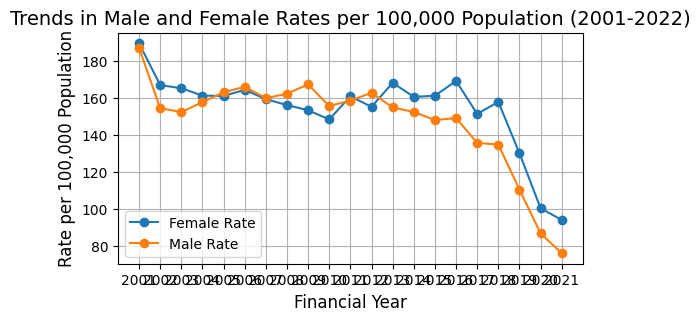

In [53]:
asth_hosp = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/hospitalisations/data-processed-alt.csv")
asth_hosp['financial year'] = asth_hosp['financial year'].str[:4].astype(int)
yearly_trends = asth_hosp.groupby('financial year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(6, 3))
plt.plot(yearly_trends['financial year'], yearly_trends['Female rate per 100,000 population'], label='Female Rate', marker='o')
plt.plot(yearly_trends['financial year'], yearly_trends['Male rate per 100,000 population'], label='Male Rate', marker='o')

plt.title('Trends in Male and Female Rates per 100,000 Population (2001-2022)', fontsize=14)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('Rate per 100,000 Population', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.legend()
plt.grid(True)
plt.show()

#### Trends

- Both genders tended to trend around the same amount of hospitalisations, with the greatest differences occuring in 2016/2017 and 2018/2019.
- Both genders trended drastically down from 2018-2021+. This is likely a result of COVID-19 protocols.
- Prior to 2012, men tended to trend above women. Post 2012, women tend to trend higher.

### Display Distribution in Asthma hospitalisations in Males and Females across LHDs.

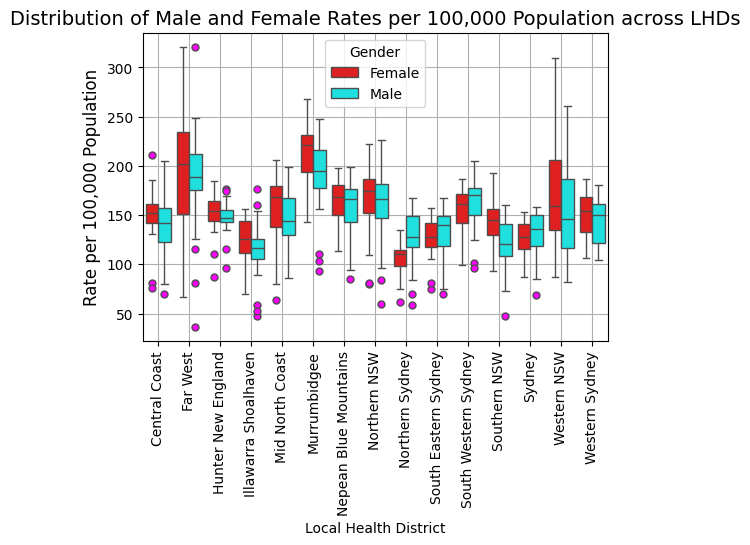

In [54]:
asth_hosp = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/hospitalisations/data-processed-alt.csv")

asth_hosp_melted = pd.melt(asth_hosp, id_vars=['lhd'], value_vars=['Female rate per 100,000 population', 'Male rate per 100,000 population'], var_name='Gender', value_name='Rate per 100,000 Population')

# Replace 'Gender' column values to 'Female' and 'Male'
asth_hosp_melted['Gender'] = asth_hosp_melted['Gender'].replace({
    'Female rate per 100,000 population': 'Female',
    'Male rate per 100,000 population': 'Male'
})

# Plot combined boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='lhd', y='Rate per 100,000 Population', hue='Gender', data=asth_hosp_melted, 
            palette={'Male': 'cyan', 'Female': 'red'},flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'fuchsia'}).set(xlabel="Local Health District")
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Distribution of Male and Female Rates per 100,000 Population across LHDs', fontsize=14)
plt.ylabel('Rate per 100,000 Population', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

#### Trends

- In both men and women, the Far West showed the greatest difference in asthma hospitalisation rates, followed by Western NSW.
- Sydney and Northern Sydney tended to be the consistently lowest rate of asthma hospitalisations, with Murrumbidgee as consistently the highest.

### Display Asthma hospitalizations per LHD over time

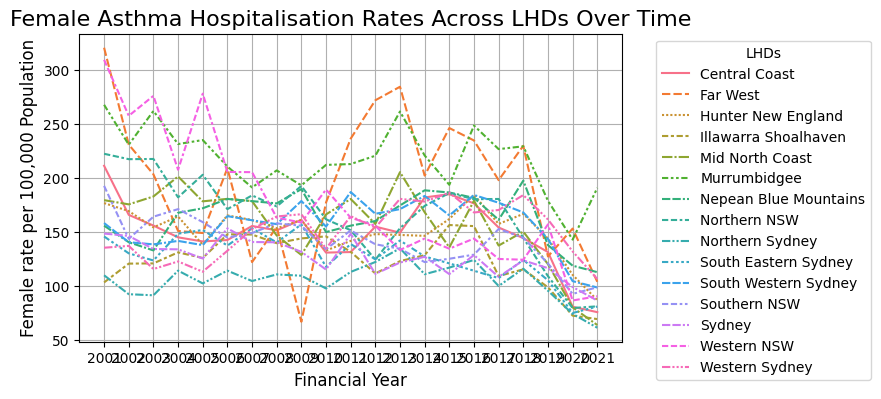

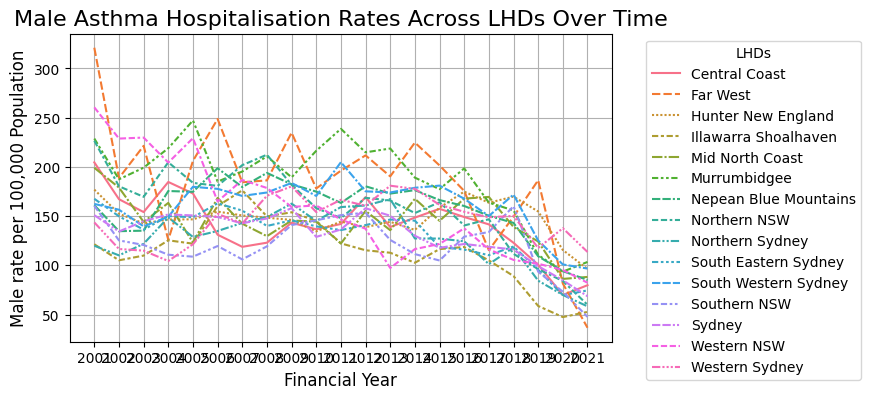

In [55]:
asth_hosp = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/hospitalisations/data-processed-alt.csv")
asth_hosp['financial year'] = asth_hosp['financial year'].str[:4].astype(int)

pivot_df = asth_hosp.pivot_table(index='financial year', columns='lhd', values='Female rate per 100,000 population', aggfunc='mean')

plt.figure(figsize=(7, 4))
sns.lineplot(data=pivot_df)
plt.title('Female Asthma Hospitalisation Rates Across LHDs Over Time', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.ylabel('Female rate per 100,000 Population', fontsize=12)
plt.legend(title='LHDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

pivot_df = asth_hosp.pivot_table(index='financial year', columns='lhd', values='Male rate per 100,000 population', aggfunc='mean')

plt.figure(figsize=(7, 4))
sns.lineplot(data=pivot_df)
plt.title('Male Asthma Hospitalisation Rates Across LHDs Over Time', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.ylabel('Male rate per 100,000 Population', fontsize=12)
plt.legend(title='LHDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Trends

- Hospitalisation rates in women tended to vary drastically on a yearly basis, with mens hospitalisation rates tending to be flatter and more consistent.
- Both genders across all LHDs trended down over the past ~20 years.
- The Far West showed the greatest variation across both genders.
- Hospitalisation of men trended upward in 2008/2009, while women drastically dropped in the same time period. The reverse then happened in the following year.

### Display Asthma Prevalence in Children over time

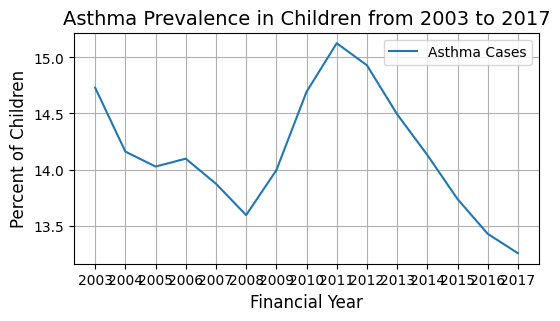

In [56]:
asth_in_child = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/prevelance-in-children/data-processed-alt.csv")
asth_in_child

asth_in_child['financial year'] = asth_in_child['financial year'].str[:4].astype(int)
yearly_trends = asth_in_child.groupby('financial year').mean(numeric_only=True).reset_index()
plt.figure(figsize=(6, 3))
plt.plot(yearly_trends['financial year'], yearly_trends['per cent'], label='Asthma Cases')

plt.title('Asthma Prevalence in Children from 2003 to 2017', fontsize=14)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('Percent of Children', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.legend()
plt.grid(True)
plt.show()


#### Trends

- Asthma cases trended down until 2008, where they increased until 2011, before falling to the lowest over the 15 year period.

### Display Asthma Prevalence in Children based on LHD

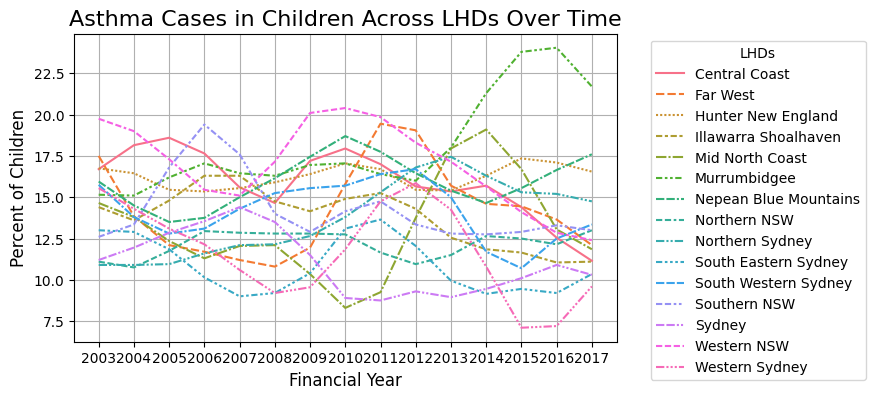

In [57]:
asth_in_child = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/prevelance-in-children/data-processed-alt.csv")
asth_in_child['financial year'] = asth_in_child['financial year'].str[:4].astype(int)
pivot_df = asth_in_child.pivot_table(index='financial year', columns='lhd', values='per cent', aggfunc='mean')

plt.figure(figsize=(7, 4))
sns.lineplot(data=pivot_df)
plt.title('Asthma Cases in Children Across LHDs Over Time', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.ylabel('Percent of Children', fontsize=12)
plt.legend(title='LHDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Trends

- Western NSW trended to typically have the highest percentage of children with Asthma, until 2013 where Murrumbidge took the lead by a large margin.
- In 2015, Western Sydney reached the lowest number of Asthma cases in children over the period.

### Display Distribution of Asthma Cases Across LHDs

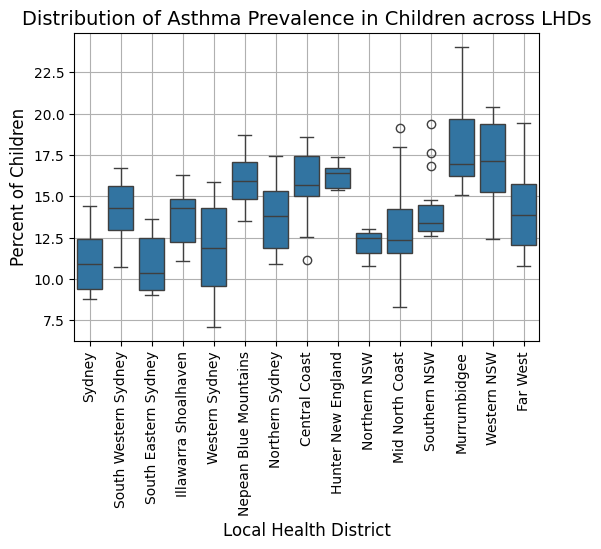

In [58]:
asth_in_child = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/prevelance-in-children/data-processed-alt.csv")
asth_in_child['financial year'] = asth_in_child['financial year'].str[:4].astype(int)

plt.figure(figsize=(6, 4))
sns.boxplot(x='lhd', y='per cent', data=asth_in_child)
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Distribution of Asthma Prevalence in Children across LHDs', fontsize=14)
plt.ylabel('Percent of Children', fontsize=12)
plt.xlabel('Local Health District', fontsize=12)
plt.grid(True)
plt.show()

#### Trends

- Hunter New England, Northern NSW and Souther NSW have the most consistent number of Asthma cases across the period.
- Western Sydney and Murrumbidgee show the greatest variation in percent of children.
- Murrumbidgee had the highest percentage overall.

### Display Asthma Deaths Over time

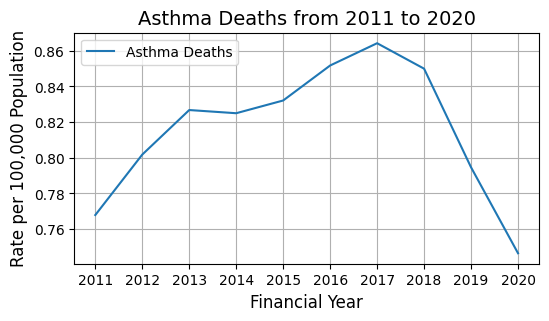

In [59]:
asth_deaths = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/deaths/data-processed.csv")
asth_deaths

asth_deaths['financial year'] = asth_deaths['financial year'].str[:4].astype(int)
yearly_trends = asth_deaths.groupby('financial year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(6, 3))
plt.plot(yearly_trends['financial year'], yearly_trends['rate per 100,000 population'], label='Asthma Deaths')
plt.title('Asthma Deaths from 2011 to 2020', fontsize=14)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('Rate per 100,000 Population', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.legend()
plt.grid(True)
plt.show()

#### Trends

- From 2011 to 2017 there was an increase in deaths from Asthma, before quickly decreasing to the lowest of the period in 2020.

### Display Asthma Deaths Over Time based on LHB

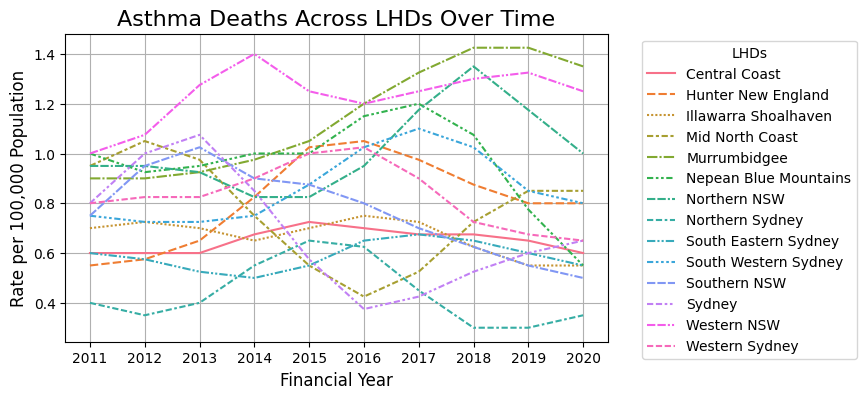

In [60]:
asth_deaths = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/deaths/data-processed.csv")
asth_deaths['financial year'] = asth_deaths['financial year'].str[:4].astype(int)
pivot_df = asth_deaths.pivot_table(index='financial year', columns='lhd', values='rate per 100,000 population', aggfunc='mean')

plt.figure(figsize=(7, 4))
sns.lineplot(data=pivot_df)
plt.title('Asthma Deaths Across LHDs Over Time', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.ylabel('Rate per 100,000 Population', fontsize=12)
plt.legend(title='LHDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Trends

- Northern Sydney typically had the lowest number of Asthma deaths, while Murrumbidgee and Western NSW typically had the highest.
- Murrumbidgee, like previous analyses, shows the highest rate.
- 2018/2019 shows the greatest variation across LHDs.

### Display Distribution of Asthma Deaths across LHDs

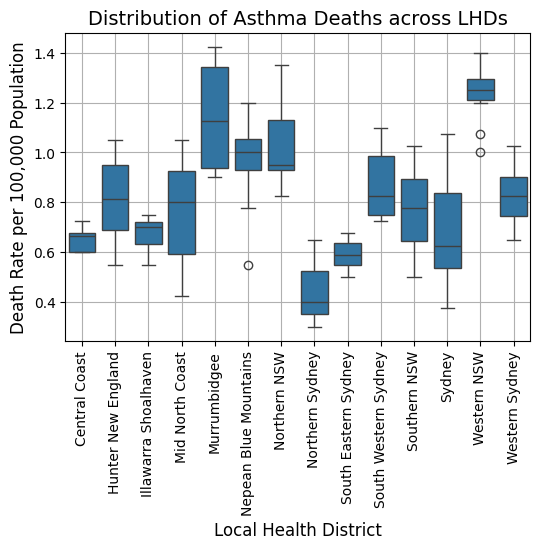

In [61]:
asth_deaths = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/deaths/data-processed.csv")
asth_deaths['financial year'] = asth_deaths['financial year'].str[:4].astype(int)

plt.figure(figsize=(6, 4))
sns.boxplot(x='lhd', y='rate per 100,000 population', data=asth_deaths)
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Distribution of Asthma Deaths across LHDs', fontsize=14)
plt.xlabel('Local Health District', fontsize=12)
plt.ylabel('Death Rate per 100,000 Population', fontsize=12)
plt.grid(True)
plt.show()

#### Trends

- South Eastern Sydney and Central Coast had the most consistent rate of Asthma deaths.
- Sydney and Mid North Coast had the greatest variation in death rates, disregarding outliers.

### Display Emergency Room Presentations due to Asthma

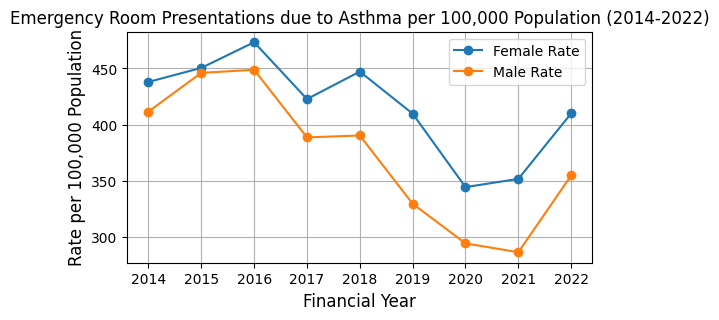

In [67]:
asth_er_pres = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/emergency-department-presentations/yearly/data-processed-alt.csv")
asth_er_pres['financial year'] = asth_er_pres['financial year'].str[:4].astype(int)
yearly_trends = asth_er_pres.groupby('financial year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(6, 3))
plt.plot(yearly_trends['financial year'], yearly_trends['Female rate per 100,000 population'], label='Female Rate', marker='o')
plt.plot(yearly_trends['financial year'], yearly_trends['Male rate per 100,000 population'], label='Male Rate', marker='o')

plt.title('Emergency Room Presentations due to Asthma per 100,000 Population (2014-2022)', fontsize=12)
plt.xlabel('Financial Year', fontsize=12)
plt.ylabel('Rate per 100,000 Population', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.legend()
plt.grid(True)
plt.show()

#### Trends

- Whilst the overall rate is higher for emergency room presentations, the general trends are similar to that of Asthma hospitalisations.
- 2020/2021 generally saw the lowest points in the period, likely due to COVID-19 and respirator/mask use. The reduction in lockdown protocols and more space in hospitals may have attributed increases into 2022.

### Display Distribution of Emergency Room Presentations Across LHDs

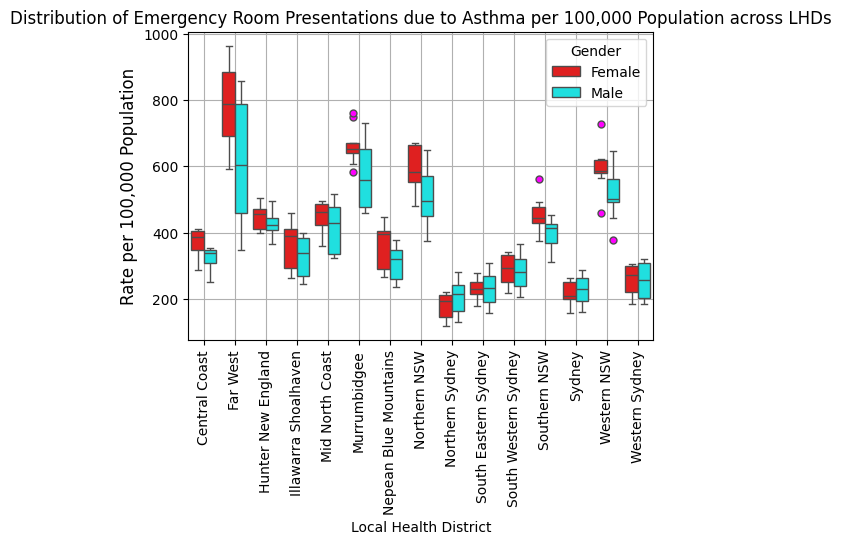

In [64]:
asth_er_pres = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/emergency-department-presentations/yearly/data-processed-alt.csv")
asth_er_pres_melted = pd.melt(asth_er_pres, id_vars=['lhd'], value_vars=['Female rate per 100,000 population', 'Male rate per 100,000 population'], var_name='Gender', value_name='Rate per 100,000 Population')

# Replace 'Gender' column values to 'Female' and 'Male'
asth_er_pres_melted['Gender'] = asth_er_pres_melted['Gender'].replace({
    'Female rate per 100,000 population': 'Female',
    'Male rate per 100,000 population': 'Male'
})

# Plot combined boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='lhd', y='Rate per 100,000 Population', hue='Gender', data=asth_er_pres_melted, 
            palette={'Male': 'cyan', 'Female': 'red'},flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'fuchsia'}).set(xlabel="Local Health District")
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title('Distribution of Emergency Room Presentations due to Asthma per 100,000 Population across LHDs', fontsize=12)
plt.ylabel('Rate per 100,000 Population', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

#### Trends

- The boxplot shows that women overall tend to present to the emergency room for Asthma more often than men.
- Variance in rates are typically greater in men than in women, with rates generally being more consistent in women.
- Northern Sydney shows the lowest number of presentations overall, with the Far West showing the most.

### Display Emergency Room Presentations due to Asthma across LHDs Over Time

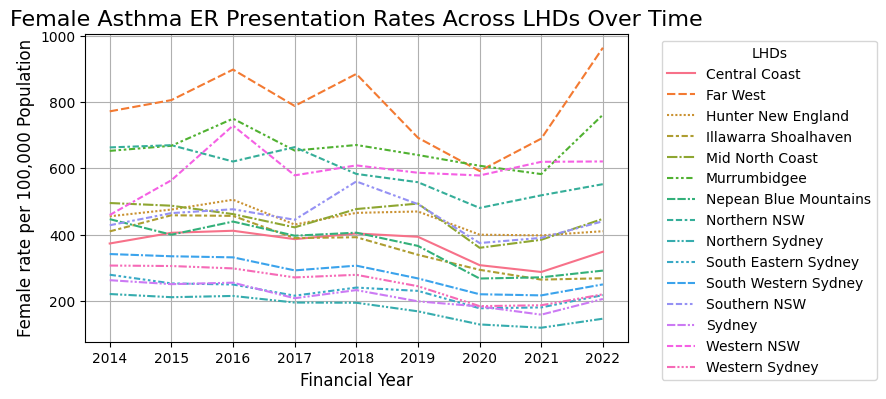

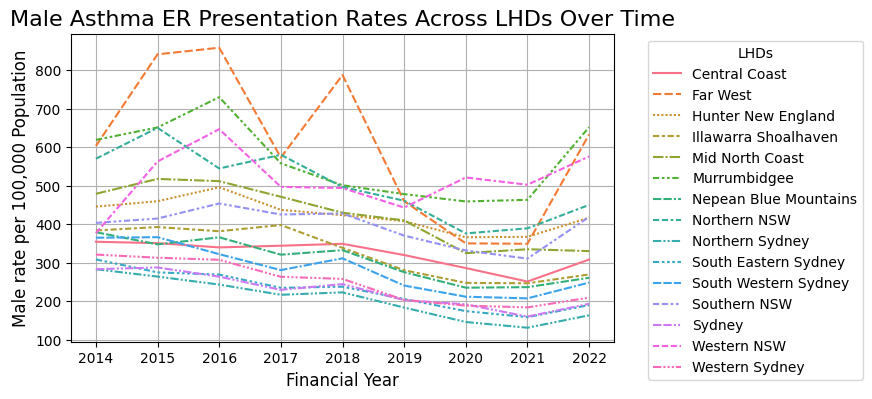

In [66]:
asth_er_pres = pd.read_csv("../1-datasets/3-nsw-health-stats/respiratory-health/asthma/emergency-department-presentations/yearly/data-processed-alt.csv")
asth_er_pres['financial year'] = asth_er_pres['financial year'].str[:4].astype(int)

pivot_df = asth_er_pres.pivot_table(index='financial year', columns='lhd', values='Female rate per 100,000 population', aggfunc='mean')

plt.figure(figsize=(7, 4))
sns.lineplot(data=pivot_df)
plt.title('Female Asthma ER Presentation Rates Across LHDs Over Time', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.ylabel('Female rate per 100,000 Population', fontsize=12)
plt.legend(title='LHDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

pivot_df = asth_er_pres.pivot_table(index='financial year', columns='lhd', values='Male rate per 100,000 population', aggfunc='mean')

plt.figure(figsize=(7, 4))
sns.lineplot(data=pivot_df)
plt.title('Male Asthma ER Presentation Rates Across LHDs Over Time', fontsize=16)
plt.xlabel('Financial Year', fontsize=12)
plt.xticks(np.arange(min(yearly_trends['financial year']), max(yearly_trends['financial year'])+1, 1.0))
plt.ylabel('Male rate per 100,000 Population', fontsize=12)
plt.legend(title='LHDs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Trends

- Almost all regions showed their lowest point from 2020/2021, before increasing again.
- The Far West tends to vary by large margins, with sharp spikes and declines.

## Chronic Obstructive Pulmonary Disease Analysis

## Influenza and Pneumonia Analysis